In [2]:
import numpy as np
import matplotlib.pyplot as plt

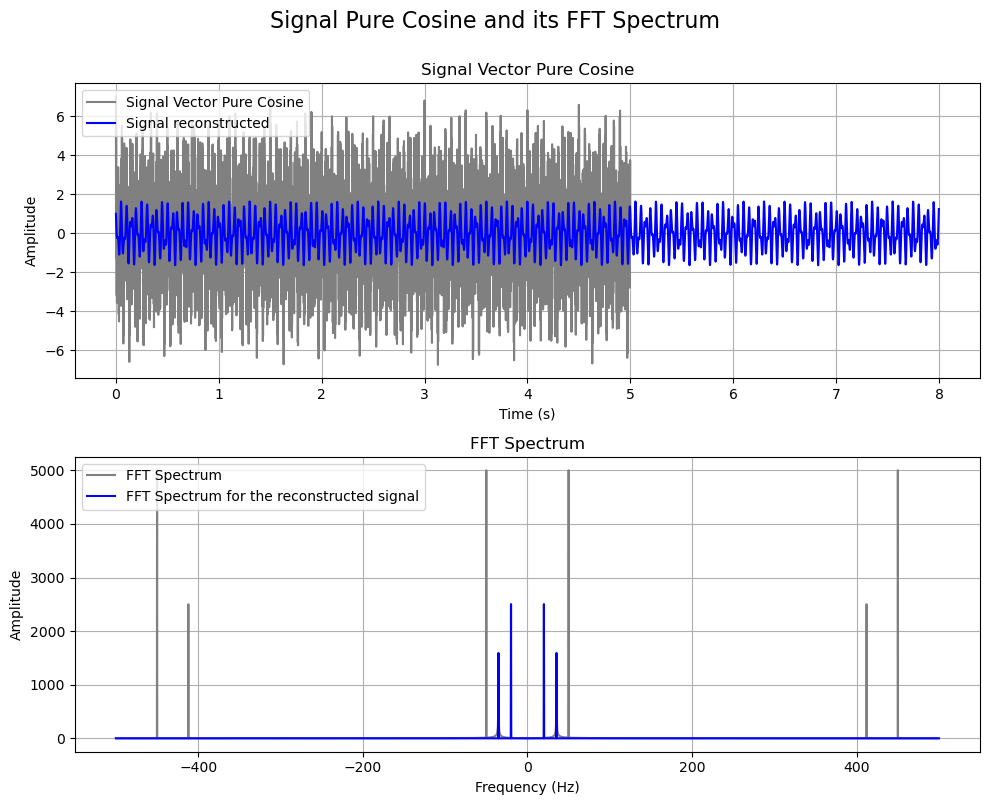

In [4]:
# SIGNAL PARAMETERS
Fs = 1000 # Sampling Frequency (Hz)
T = 5.0 # Signal Duration (seconds)
N = int(Fs*T) # Total number of samples

# Time - From 0.0 to T
t = np.linspace(0.0, T, N, endpoint=False) 

# Frequencies
frequencies = [20, 35.3, 412, 550, 950, 1050, 1450]

# Create the signal pure cosine
def signal(t, freqs):
    x = np.zeros_like(t)
    for f in freqs:
        x += np.cos(2*np.pi*f*t)
    return x

signal_original = signal(t, frequencies)

# Compute FFT

X = np.fft.fft(signal_original)
freqs = np.fft.fftfreq(N, 1/Fs)

# FFT Shifted (For better visualization)
X_shifted_abs = np.fft.fftshift(np.abs(X))
freqs_shifted = np.fft.fftshift(freqs)

### RECONSTRUCT OF SIGNAL WITH FREQUENCIES f1 AND f2

# Frequencies of interest
f1 = frequencies[0]
f2 = frequencies[1]
tolerance = 0.1

# Find indexes of the frequencies (positives y negatives)
idx_f1_pos = np.where(np.abs(freqs - f1) < tolerance)[0]
idx_f1_neg = np.where(np.abs(freqs - (-f1)) < tolerance)[0]

idx_f2_pos = np.where(np.abs(freqs - f2) < tolerance)[0]
idx_f2_neg = np.where(np.abs(freqs - (-f2)) < tolerance)[0]

# Combine all indexes
target_idx = np.concatenate([idx_f1_pos, idx_f1_neg, idx_f2_pos, idx_f2_neg])

# New Spectrum for f1 and f2
X_constructed = np.zeros_like(X, dtype=complex)
# Copy the values of f1 and f2 from the original spectrum
X_constructed[target_idx] = X[target_idx]
X_constructed_shifted_abs = np.fft.fftshift(np.abs(X_constructed)) #Shifted only for visualization

# Compute Inverse Transform Fourier
signal_reconstructed = np.fft.ifft(X_constructed)
signal_reconstructed = signal_reconstructed.real    #Only real part of the constructed signal

# Reconstructed Signal Beyond 5 seconds
signal_reconstructed_ext = np.tile(signal_reconstructed, 2)
duration = 8.0
nsamples_ext = int(duration*Fs)

t_ext = np.linspace(0, duration, nsamples_ext, endpoint=False)
signal_reconstructed_ext = signal_reconstructed_ext[:nsamples_ext]

plt.figure(figsize=(10, 4*2))

plt.subplot(2, 1, 1)
plt.plot(t, signal_original, label=f'Signal Vector Pure Cosine', color='gray')
plt.plot(t_ext, signal_reconstructed_ext, label=f'Signal reconstructed', color='blue')
#plt.xlim([10, 90]) 
plt.title(f'Signal Vector Pure Cosine')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(freqs_shifted, X_shifted_abs, label=f'FFT Spectrum', color='gray')
plt.plot(freqs_shifted, X_constructed_shifted_abs, label=f'FFT Spectrum for the reconstructed signal', color='blue')
#plt.plot(np.real(X), label=f'FFT Spectrum', color='red')
#plt.xlim([0, 50]) 
plt.title(f'FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='upper left')

plt.suptitle('Signal Pure Cosine and its FFT Spectrum', fontsize=16, y=1)
plt.tight_layout()
plt.savefig('aliasing_spectrum')
plt.show()



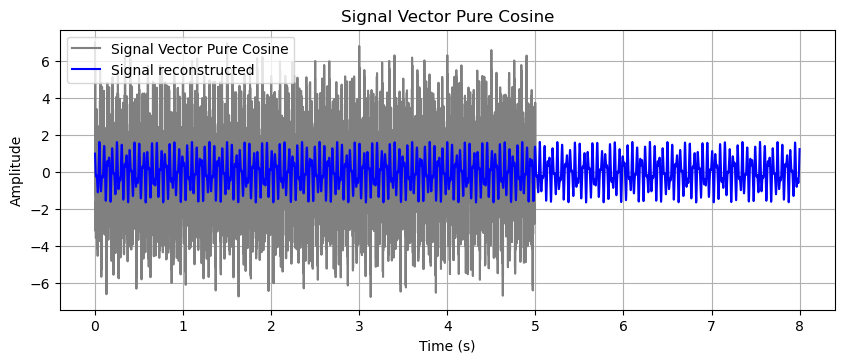

In [3]:
siganal_reconstructed_ext = np.tile(signal_reconstructed, 2)
duration = 8.0
nsamples_ext = int(duration*Fs)

t_ext = np.linspace(0, duration, nsamples_ext, endpoint=False)
siganal_reconstructed_ext = siganal_reconstructed_ext[:nsamples_ext]

plt.figure(figsize=(10, 4*2))

plt.subplot(2, 1, 1)
plt.plot(t, signal_original, label=f'Signal Vector Pure Cosine', color='gray')
plt.plot(t_ext, siganal_reconstructed_ext, label=f'Signal reconstructed', color='blue')
#plt.xlim([10, 90]) 
plt.title(f'Signal Vector Pure Cosine')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()


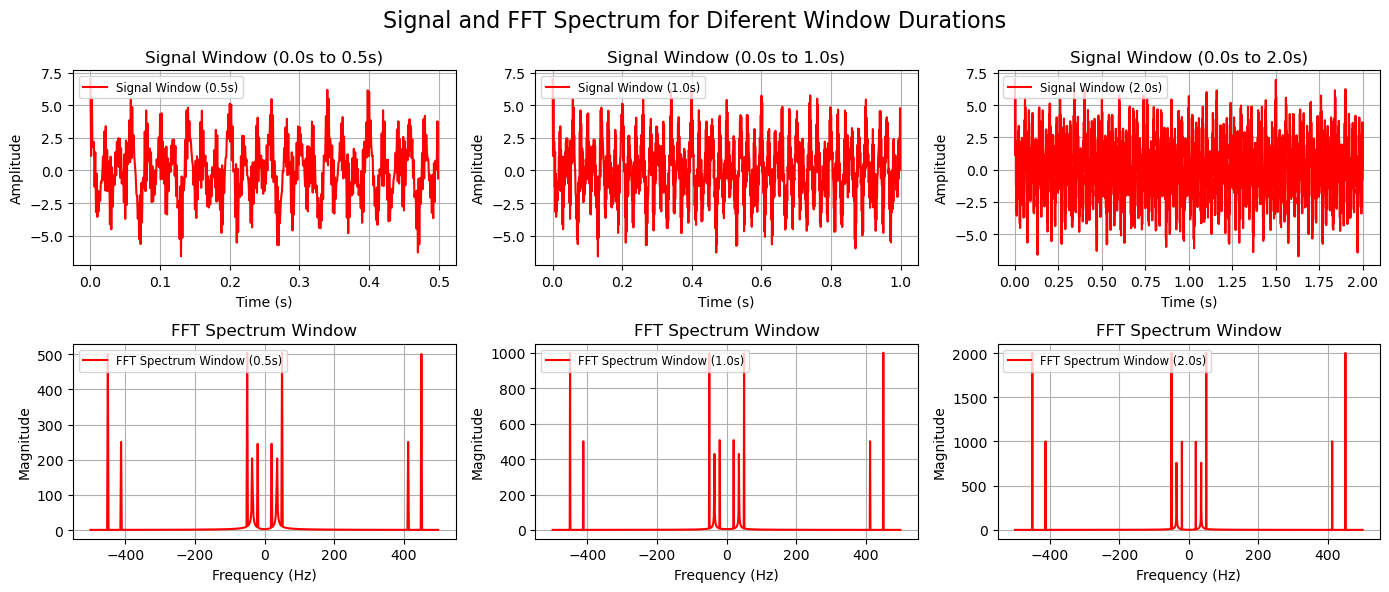

In [15]:
window = [0.5, 1.0, 2.0]

plt.figure(figsize=(14, 2*3))

for i in range(len(window)):

    window_duration = window[i]  # Duration of the window (seconds)
    N_window = int(Fs * window_duration)  # Number of samples of the window

    signal_window = signal_original[:N_window] # Signal in the window

    # Compute FFT of the signal windowed
    X_window = np.fft.fft(signal_window)
    freqs_window = np.fft.fftfreq(N_window, 1/Fs)
    # FFT shift only for better visualization
    X_window_shifted_abs = np.fft.fftshift(np.abs(X_window))
    freqs_window_shifted = np.fft.fftshift(freqs_window)

    ## PLOTTING

    # Signal Plot
    plt.subplot(2, 3, i+1)
    t_window = t[:N_window]
    plt.plot(t_window, signal_window, label=f'Signal Window ({window_duration}s)', color='red')
    plt.title(f'Signal Window (0.0s to {window_duration}s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize = 'small')

    # Spectrum Plot
    plt.subplot(2, 3, i+1+3)
    plt.plot(freqs_window_shifted, X_window_shifted_abs, label=f'FFT Spectrum Window ({window_duration}s)', color='red')
    plt.title(f'FFT Spectrum Window')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.legend(loc='upper left', fontsize = 'small')

plt.suptitle(f'Signal and FFT Spectrum for Diferent Window Durations', fontsize=16)
plt.tight_layout()
plt.savefig('windowing_effects')
plt.show()